#### Analyzing Neural Time Series Data
Python code for Chapter 11 -- converted from original Matlab by AE Studio (and ChatGPT)\
Original Matlab code by Mike X Cohen

This code accompanies the book, titled "Analyzing Neural Time Series Data" (MIT Press).\
Using the code without following the book may lead to confusion, incorrect data analyses, and misinterpretations of results.\
Mike X Cohen and AE Studio assume no responsibility for inappropriate or incorrect use of this code.

In [13]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.fft import fft, ifft
from scipy.io import loadmat

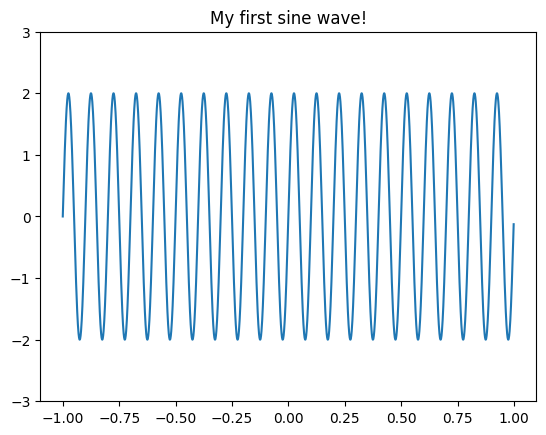

In [2]:
# Figure 11.1

# Define parameters
srate = 1000  # sampling rate of 1 kHz
time = np.arange(-1, 1, 1/srate)
freq = 10  # in Hz
amp = 2  # amplitude, or height of the sine wave

# Create sine wave
sine_wave = amp * np.sin(2 * np.pi * freq * time)

# Plot sine wave
plt.figure()
plt.plot(time, sine_wave)
plt.ylim([-3, 3])  # this adjusts the y-axis limits for visibility
plt.title('My first sine wave!')
plt.show()

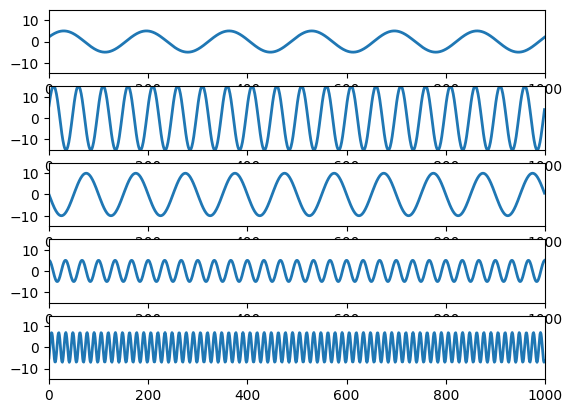

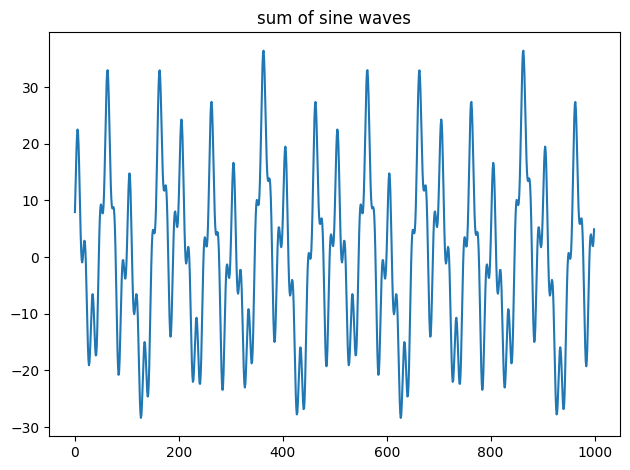

In [3]:
# Figure 11.2

# Define a sampling rate
srate = 500

# List some frequencies
frex = [3, 10, 5, 15, 35]

# List some random amplitudes
amplit = [5, 15, 10, 5, 7]

# Phases
phases = [np.pi/7, np.pi/8, np.pi, np.pi/2, -np.pi/4]

# Define time
time = np.arange(-1, 1, 1/srate)

# Loop through frequencies and create sine waves
sine_waves = np.zeros((len(frex), len(time)))
for fi in range(len(frex)):
    sine_waves[fi, :] = amplit[fi] * np.sin(2 * np.pi * frex[fi] * time + phases[fi])

# Plot each wave separately
plt.figure()
for fi in range(len(frex)):
    plt.subplot(len(frex), 1, fi+1)
    plt.plot(sine_waves[fi, :], linewidth=2)
    plt.axis([0, len(time), -max(amplit), max(amplit)])
plt.show()

# Plot the result
plt.figure()
plt.plot(np.sum(sine_waves, axis=0))
plt.title('sum of sine waves')
plt.tight_layout()
plt.show()

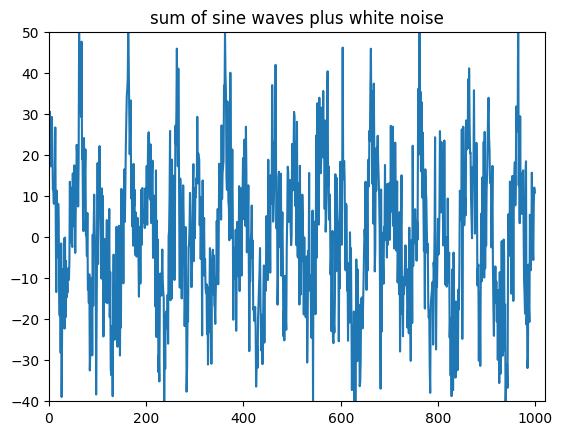

In [4]:
# Figure 11.3

# Plot sum of sine waves plus random noise
plt.figure()
plt.plot(np.sum(sine_waves + 5 * np.random.randn(*sine_waves.shape), axis=0))
plt.axis([0, 1020, -40, 50])  # this sets the x-axis and y-axis limits
plt.title('sum of sine waves plus white noise')
plt.show()

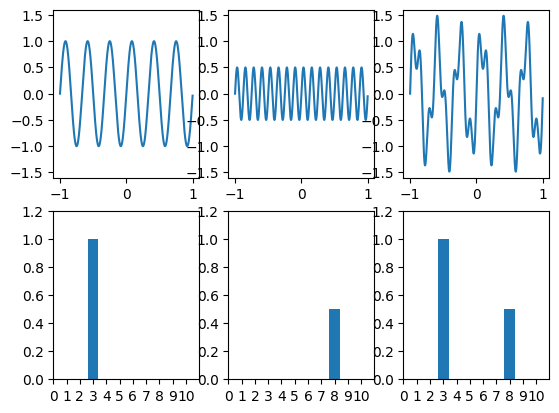

In [5]:
# Figure 11.4

# Create three sine waves
s1 = np.sin(2 * np.pi * 3 * time)
s2 = 0.5 * np.sin(2 * np.pi * 8 * time)
s3 = s1 + s2

# Plot the sine waves
plt.figure()
for i, s in enumerate([s1, s2, s3], 1):
    plt.subplot(2, 3, i)
    plt.plot(time, s)
    plt.ylim([-1.6, 1.6])
    plt.yticks(np.arange(-1.5, 1.6, 0.5))
    
    # Plot power
    plt.subplot(2, 3, i+3)
    f = fft(s) / len(time)
    hz = np.linspace(0, srate/2, int(np.floor(len(time)/2)+1))
    plt.bar(hz, np.abs(f[:len(hz)]) * 2)
    plt.xlim([0, 11])
    plt.ylim([0, 1.2])
    plt.xticks(np.arange(0, 11))
plt.show()

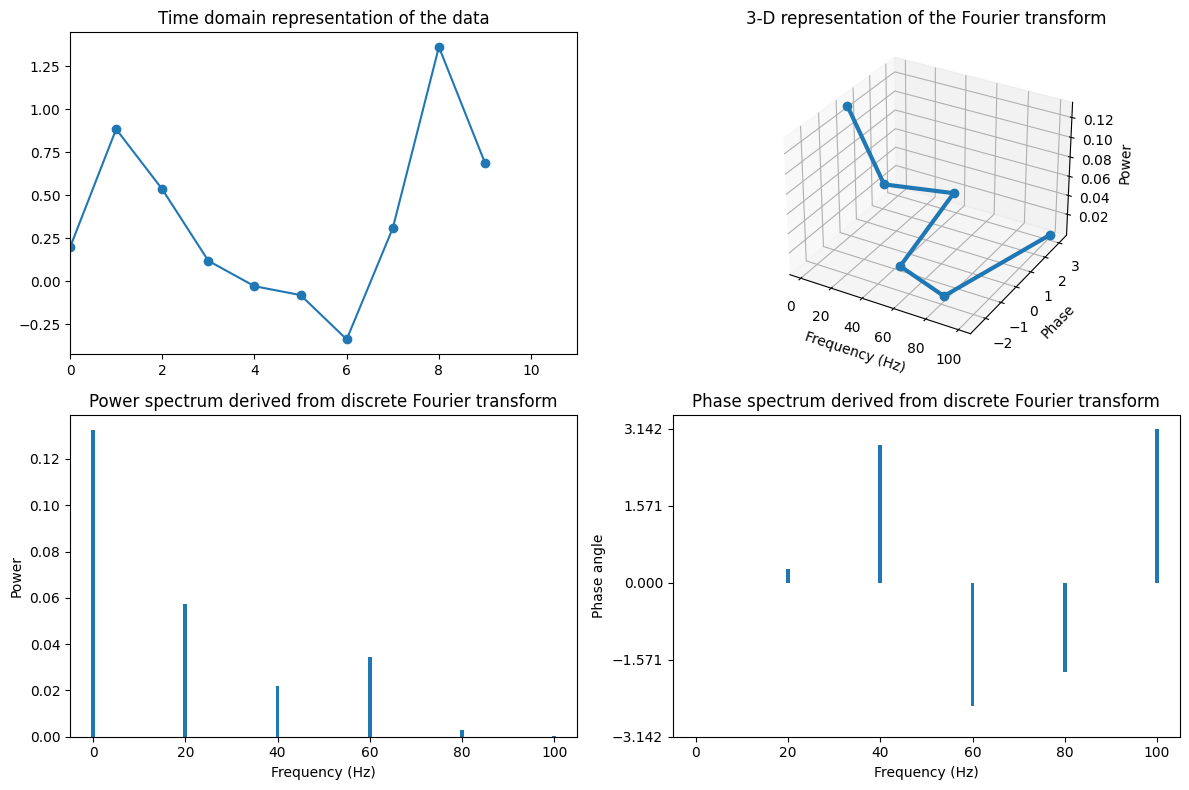

In [12]:
# Figure 11.5

# Length of sequence
N = 10
# Random numbers
data = np.random.randn(N)
# Sampling rate in Hz
srate = 200
# Nyquist frequency
nyquist = srate / 2
# Initialize Fourier output matrix
fourier = np.zeros(N, dtype=complex)
# Frequencies in Hz
frequencies = np.linspace(0, nyquist, int(N/2)+1)
# Time
time = np.arange(N) / N

# Fourier transform is dot-product between sine wave and data at each frequency
for fi in range(N):
    sine_wave = np.exp(-1j * 2 * np.pi * (fi) * time)
    fourier[fi] = np.sum(sine_wave * data)
fourier = fourier / N

# Plotting
fig = plt.figure(figsize=(12, 8))

ax1 = fig.add_subplot(221)
ax1.plot(data, '-o')
ax1.set_xlim([0, N+1])
ax1.set_title('Time domain representation of the data')

ax2 = fig.add_subplot(222, projection='3d')
ax2.plot3D(frequencies, np.angle(fourier[:int(N/2)+1]), np.abs(fourier[:int(N/2)+1])**2, '-o', linewidth=3)
ax2.grid(True)
ax2.set_xlabel('Frequency (Hz)')
ax2.set_ylabel('Phase')
ax2.set_zlabel('Power')
ax2.set_title('3-D representation of the Fourier transform')

ax3 = fig.add_subplot(223)
ax3.bar(frequencies, np.abs(fourier[:int(N/2)+1])**2)
ax3.set_xlim([-5, 105])
ax3.set_xlabel('Frequency (Hz)')
ax3.set_ylabel('Power')
ax3.set_title('Power spectrum derived from discrete Fourier transform')

ax4 = fig.add_subplot(224)
ax4.bar(frequencies, np.angle(fourier[:int(N/2)+1]))
ax4.set_xlim([-5, 105])
ax4.set_xlabel('Frequency (Hz)')
ax4.set_ylabel('Phase angle')
ax4.set_yticks(np.arange(-np.pi, np.pi+1, np.pi/2))
ax4.set_title('Phase spectrum derived from discrete Fourier transform')

plt.tight_layout()
plt.show()

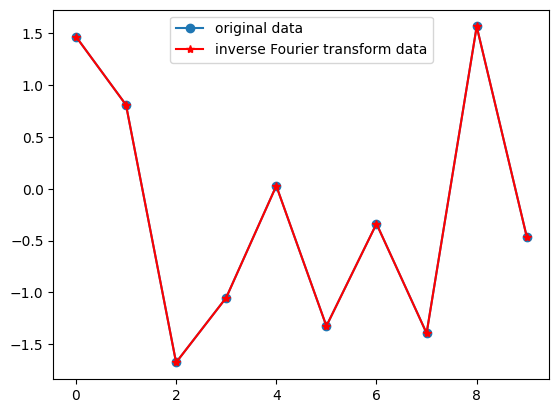

In [7]:
# Figure 11.6

# Compute sine waves and sum to recover the original time series
reconstructed_data = np.zeros(N)
for fi in range(N):
    sine_wave = fourier[fi] * np.exp(1j * 2 * np.pi * (fi) * time)
    reconstructed_data += np.real(sine_wave)

# Plot original and reconstructed data
plt.figure()
plt.plot(data, '-o', label='original data')
plt.plot(reconstructed_data, 'r-*', label='inverse Fourier transform data')
plt.legend()
plt.show()

/Users/kylemcgraw/.pyenv/versions/3.10.12/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


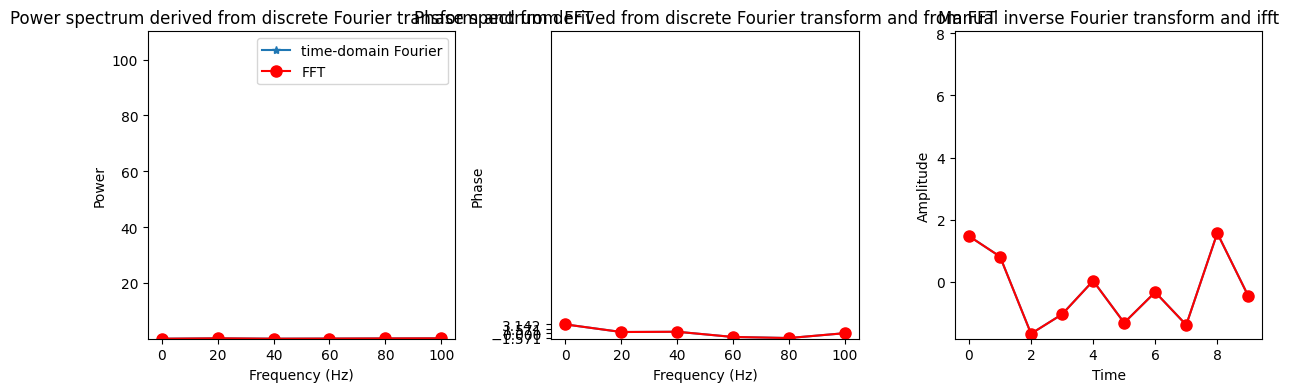

In [8]:
# Figure 11.7

# Perform FFT
fft_data = fft(data) / N

# Plotting
plt.figure(figsize=(12, 4))

plt.subplot(131)
plt.plot(frequencies, np.abs(fourier[:int(N/2)+1])**2, '*-', label='time-domain Fourier')
plt.plot(frequencies, np.abs(fft_data[:int(N/2)+1])**2, 'ro-', markersize=8, label='FFT')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')
plt.title('Power spectrum derived from discrete Fourier transform and from FFT')
plt.axis('square')
plt.legend()

plt.subplot(132)
plt.plot(frequencies, np.angle(fourier[:int(N/2)+1]), '*-', label='time-domain Fourier')
plt.plot(frequencies, np.angle(fft_data[:int(N/2)+1]), 'ro-', markersize=8, label='FFT')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase')
plt.yticks(np.arange(-np.pi, np.pi+1, np.pi/2))
plt.title('Phase spectrum derived from discrete Fourier transform and from FFT')
plt.axis('square')

plt.subplot(133)
plt.plot(reconstructed_data, '*-', label='Manual inverse Fourier transform')
plt.plot(ifft(fft(data)), 'ro-', markersize=8, label='ifft')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Manual inverse Fourier transform and ifft')
plt.axis('square')

plt.tight_layout()
plt.show()

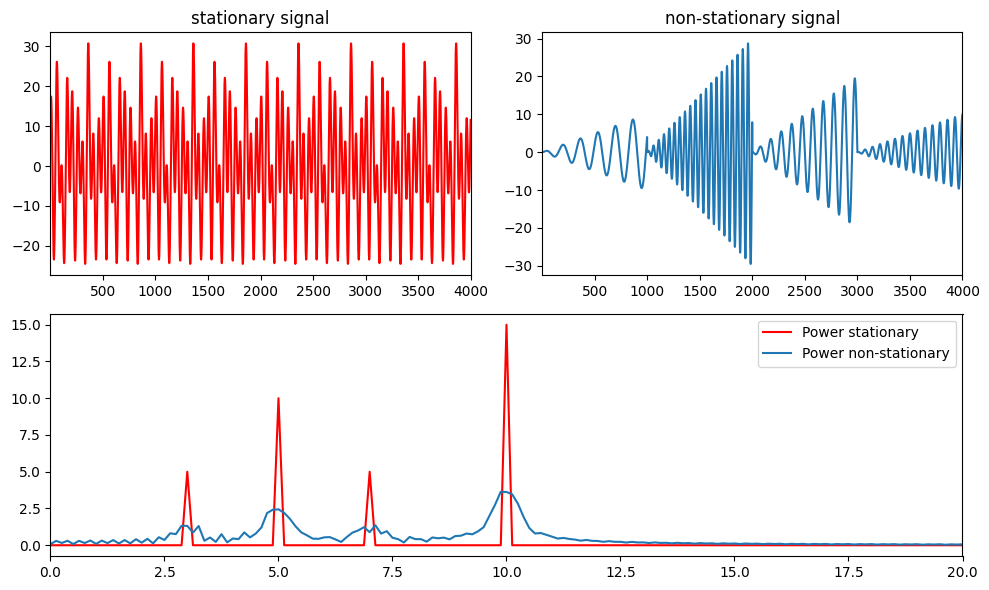

In [9]:
# Figure 11.9

# List some frequencies
frex = [3, 10, 5, 7]

# List some random amplitudes
amplit = [5, 15, 10, 5]

# Phases
phases = [np.pi/7, np.pi/8, np.pi, np.pi/2]

# Create a time series of sequenced sine waves
srate = 500
time = np.arange(-1, 1, 1/srate)
stationary = np.zeros(len(time) * len(frex))
nonstationary = np.zeros(len(time) * len(frex))

for fi in range(len(frex)):
    temp_sine_wave = amplit[fi] * np.sin(2 * np.pi * frex[fi] * time + phases[fi])
    stationary += np.tile(temp_sine_wave, len(frex))
    temp_sine_wave *= (time + 1)
    start_idx = fi * len(time)
    stop_idx = start_idx + len(time)
    nonstationary[start_idx:stop_idx] = temp_sine_wave

# Plot stationary and non-stationary signals
plt.figure(figsize=(10, 6))

plt.subplot(221)
plt.plot(stationary, 'r')
plt.xlim([1, len(stationary)])
plt.title('stationary signal')

plt.subplot(222)
plt.plot(nonstationary)
plt.xlim([1, len(nonstationary)])
plt.title('non-stationary signal')

# Perform FFT and plot
frequencies = np.linspace(0, srate/2, int(len(nonstationary)/2)+1)
fft_nonstationary = fft(nonstationary) / len(nonstationary)
fft_stationary = fft(stationary) / len(stationary)
plt.subplot(212)
plt.plot(frequencies, np.abs(fft_stationary[:len(frequencies)])*2, 'r', label='Power stationary')
plt.plot(frequencies, np.abs(fft_nonstationary[:len(frequencies)])*2, label='Power non-stationary')
plt.xlim([0, max(frex)*2])
plt.legend()

plt.tight_layout()
plt.show()

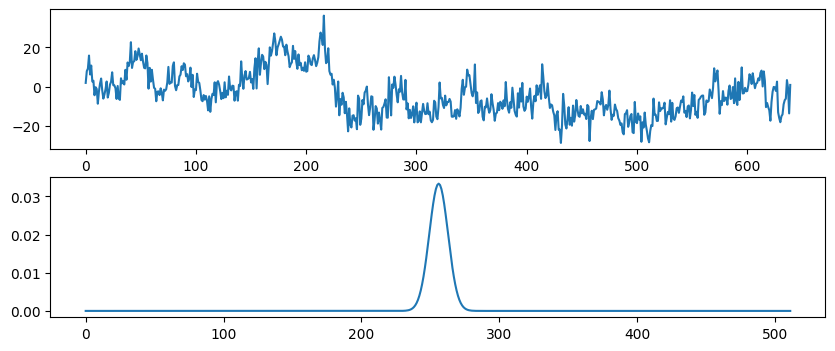

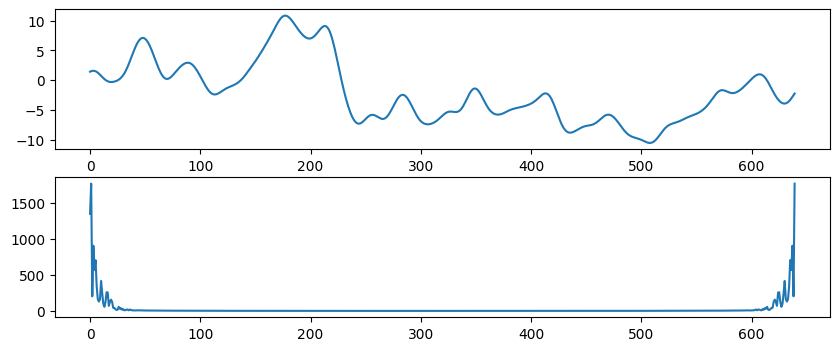

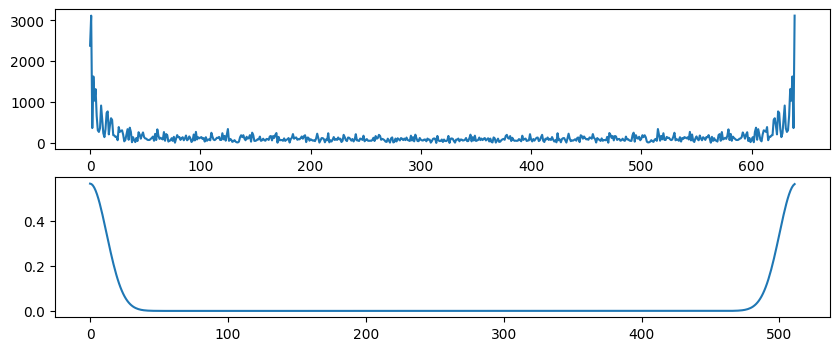

In [15]:
# Figure 11.10

# Load sample EEG data
eeg_data = loadmat('../data/sampleEEGdata.mat')
eegdat4convol=np.squeeze(eeg_data["EEG"][0,0]["data"][46,:,0])
srate = float(eeg_data["EEG"][0,0]["srate"][0,0])

# Create Gaussian
time = np.arange(-1, 1, 1/srate)
s = 5 / (2 * np.pi * 30)
gaussian = np.exp(-time**2 / (2 * s**2)) / 30

# Plot EEG data and Gaussian
plt.figure(figsize=(10, 4))

plt.subplot(211)
plt.plot(eegdat4convol)

plt.subplot(212)
plt.plot(gaussian)

plt.show()

# Plot convolution results
plt.figure(figsize=(10, 4))

plt.subplot(211)
plt.plot(np.convolve(eegdat4convol, gaussian, 'same'))

plt.subplot(212)
plt.plot(np.abs(fft(np.convolve(eegdat4convol, gaussian, 'same'))))

plt.show()

# Plot FFT results
plt.figure(figsize=(10, 4))

plt.subplot(211)
plt.plot(np.abs(fft(eegdat4convol)))

plt.subplot(212)
plt.plot(np.abs(fft(gaussian)))

plt.show()

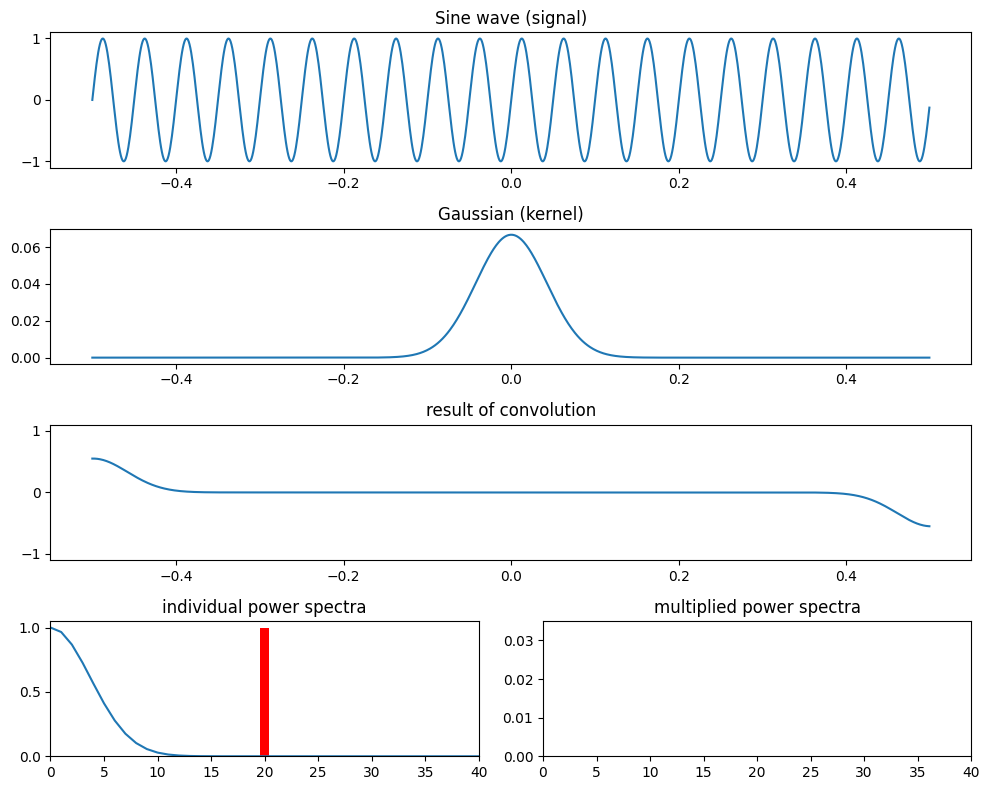

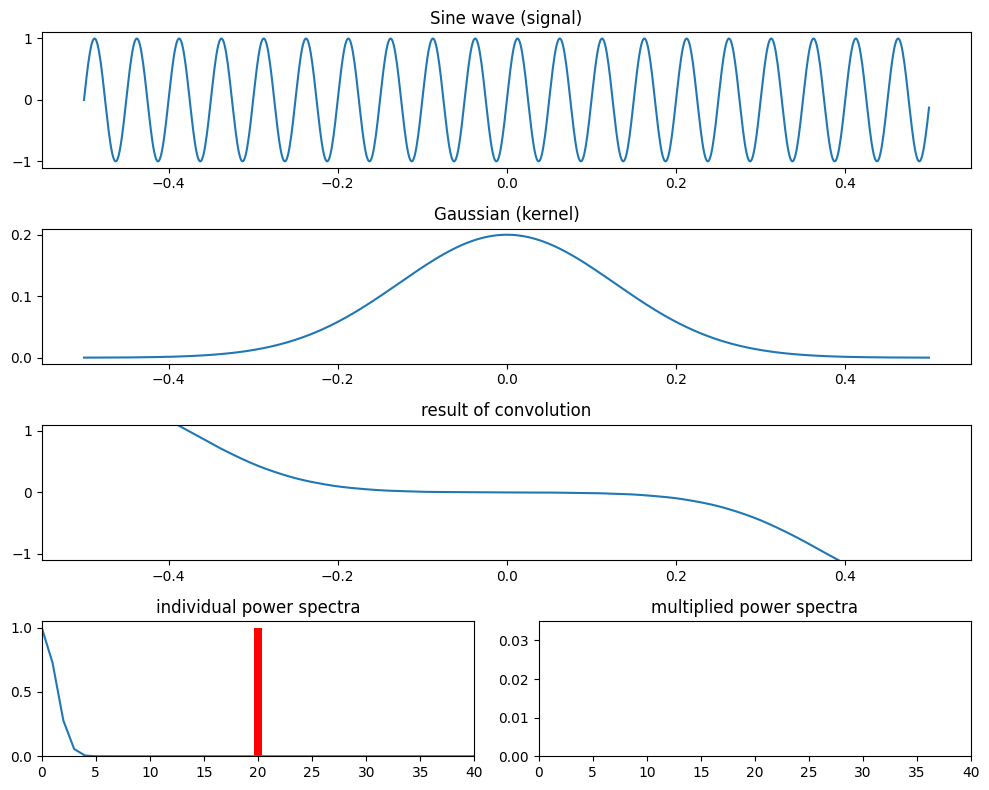

In [16]:
# Figure 11.11

# Define parameters
srate = 1000
time = np.arange(-0.5, 0.5, 1/srate)
f = 20
fg = [15, 5]
s = np.sin(2 * np.pi * f * time)

# Loop over Gaussian widths
for i in range(2):
    g = np.exp(-time**2 / (2 * (4 / (2 * np.pi * fg[i]))**2)) / fg[i]
    
    plt.figure(figsize=(10, 8))
    
    plt.subplot(411)
    plt.plot(time, s)
    plt.title('Sine wave (signal)')
    plt.ylim([-1.1, 1.1])
    
    plt.subplot(412)
    plt.plot(time, g)
    plt.title('Gaussian (kernel)')
    
    plt.subplot(413)
    plt.plot(time, np.convolve(s, g, 'same'))
    plt.ylim([-1.1, 1.1])
    plt.title('result of convolution')
    
    plt.subplot(427)
    fft_s = np.abs(fft(s))
    fft_s = fft_s[:int(len(fft_s)/2)+1] / np.max(fft_s[:int(len(fft_s)/2)+1])
    plt.bar(np.arange(501), fft_s, color='r')
    
    fft_g = np.abs(fft(g))
    fft_g = fft_g[:int(len(fft_g)/2)+1] / np.max(fft_g[:int(len(fft_g)/2)+1])
    plt.plot(np.arange(501), fft_g)
    plt.xlim([0, 40])
    plt.ylim([0, 1.05])
    plt.title('individual power spectra')
    
    plt.subplot(428)
    plt.bar(np.arange(501), fft_g * fft_s)
    plt.xlim([0, 40])
    plt.ylim([0, 0.035])
    plt.title('multiplied power spectra')
    
    plt.tight_layout()
    plt.show()

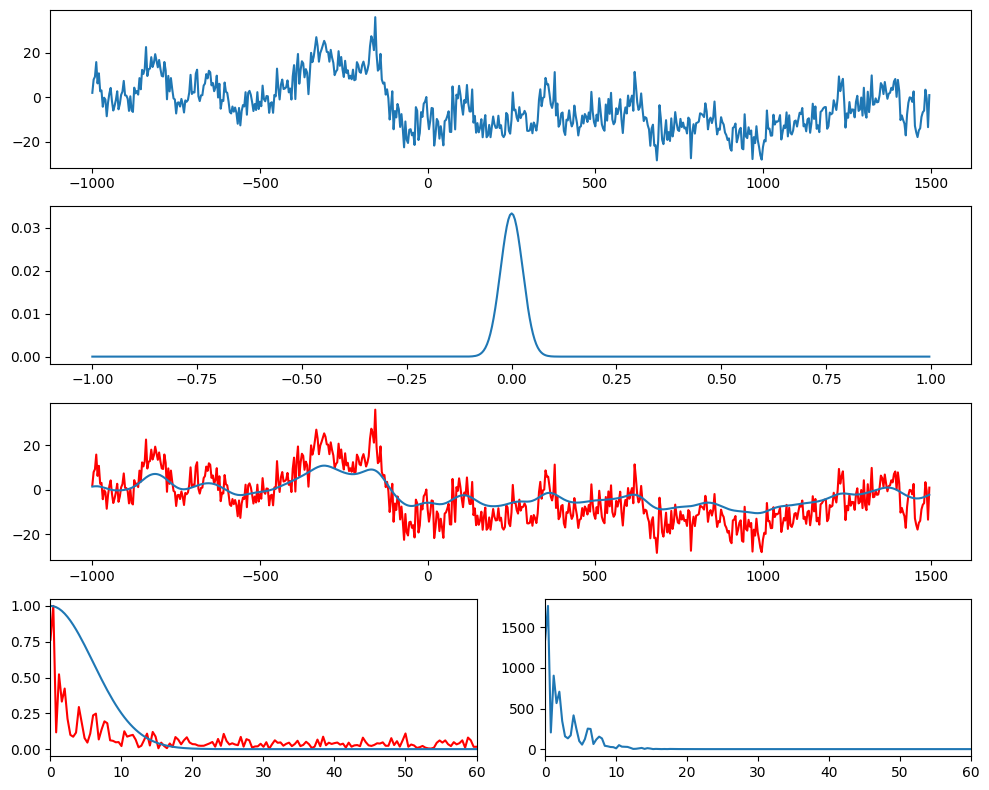

In [19]:
# Figure 11.12
times = eeg_data["EEG"][0,0]["times"][0]
srate = float(eeg_data["EEG"][0,0]["srate"][0,0])

# Create Gaussian
time = np.arange(-1, 1, 1/srate)
s = 5 / (2 * np.pi * 30)
gaussian = np.exp(-time**2 / (2 * s**2)) / 30

# Plot EEG data, Gaussian, and result of convolution
plt.figure(figsize=(10, 8))

plt.subplot(411)
plt.plot(times, eegdat4convol)

plt.subplot(412)
plt.plot(time, gaussian)

plt.subplot(413)
plt.plot(times, eegdat4convol, 'r')
plt.plot(times, np.convolve(eegdat4convol, gaussian, 'same'))

nfft = len(eegdat4convol)
fft_s = np.abs(fft(eegdat4convol, nfft))
fft_s = fft_s[:int(nfft/2)+1]
f = np.linspace(0, srate/2, int(nfft/2)+1)

plt.subplot(427)
plt.plot(f, fft_s / np.max(fft_s), 'r')

fft_g = np.abs(fft(gaussian, nfft))
fft_g = fft_g[:int(nfft/2)+1]
plt.plot(f, fft_g / np.max(fft_g))

plt.xlim([0, 60])

plt.subplot(428)
plt.plot(f, fft_s * fft_g)
plt.xlim([0, 60])

plt.tight_layout()
plt.show()